In [5]:
import holoviews as hv
import panel as pn
import param
import pandas as pd
import umap
from bokeh.models import BoxSelectTool, BoxZoomTool, ResetTool, TapTool, SaveTool, PanTool, WheelZoomTool
from sklearn import decomposition, manifold
from sklearn.preprocessing import MinMaxScaler

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import panel as pn
pn.extension('tabulator') # Interactive tables

import hvplot.pandas # Interactive dataframes

In [92]:
df = pd.read_csv("data\StudentsPerformance.csv")

## Data Exploration

In [93]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [94]:
df.insert(0,'id',df.index)

In [95]:
df.head(3)

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93


In [96]:
df.shape

(1000, 9)

In [97]:
df.columns

Index(['id', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [98]:
numeric_features = ['math score', 'reading score', 'writing score']
categoric_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

### Description uivariée

In [99]:
# Description of numeric data
df[numeric_features].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [100]:
df.isnull().sum()

id                             0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in this dataframe

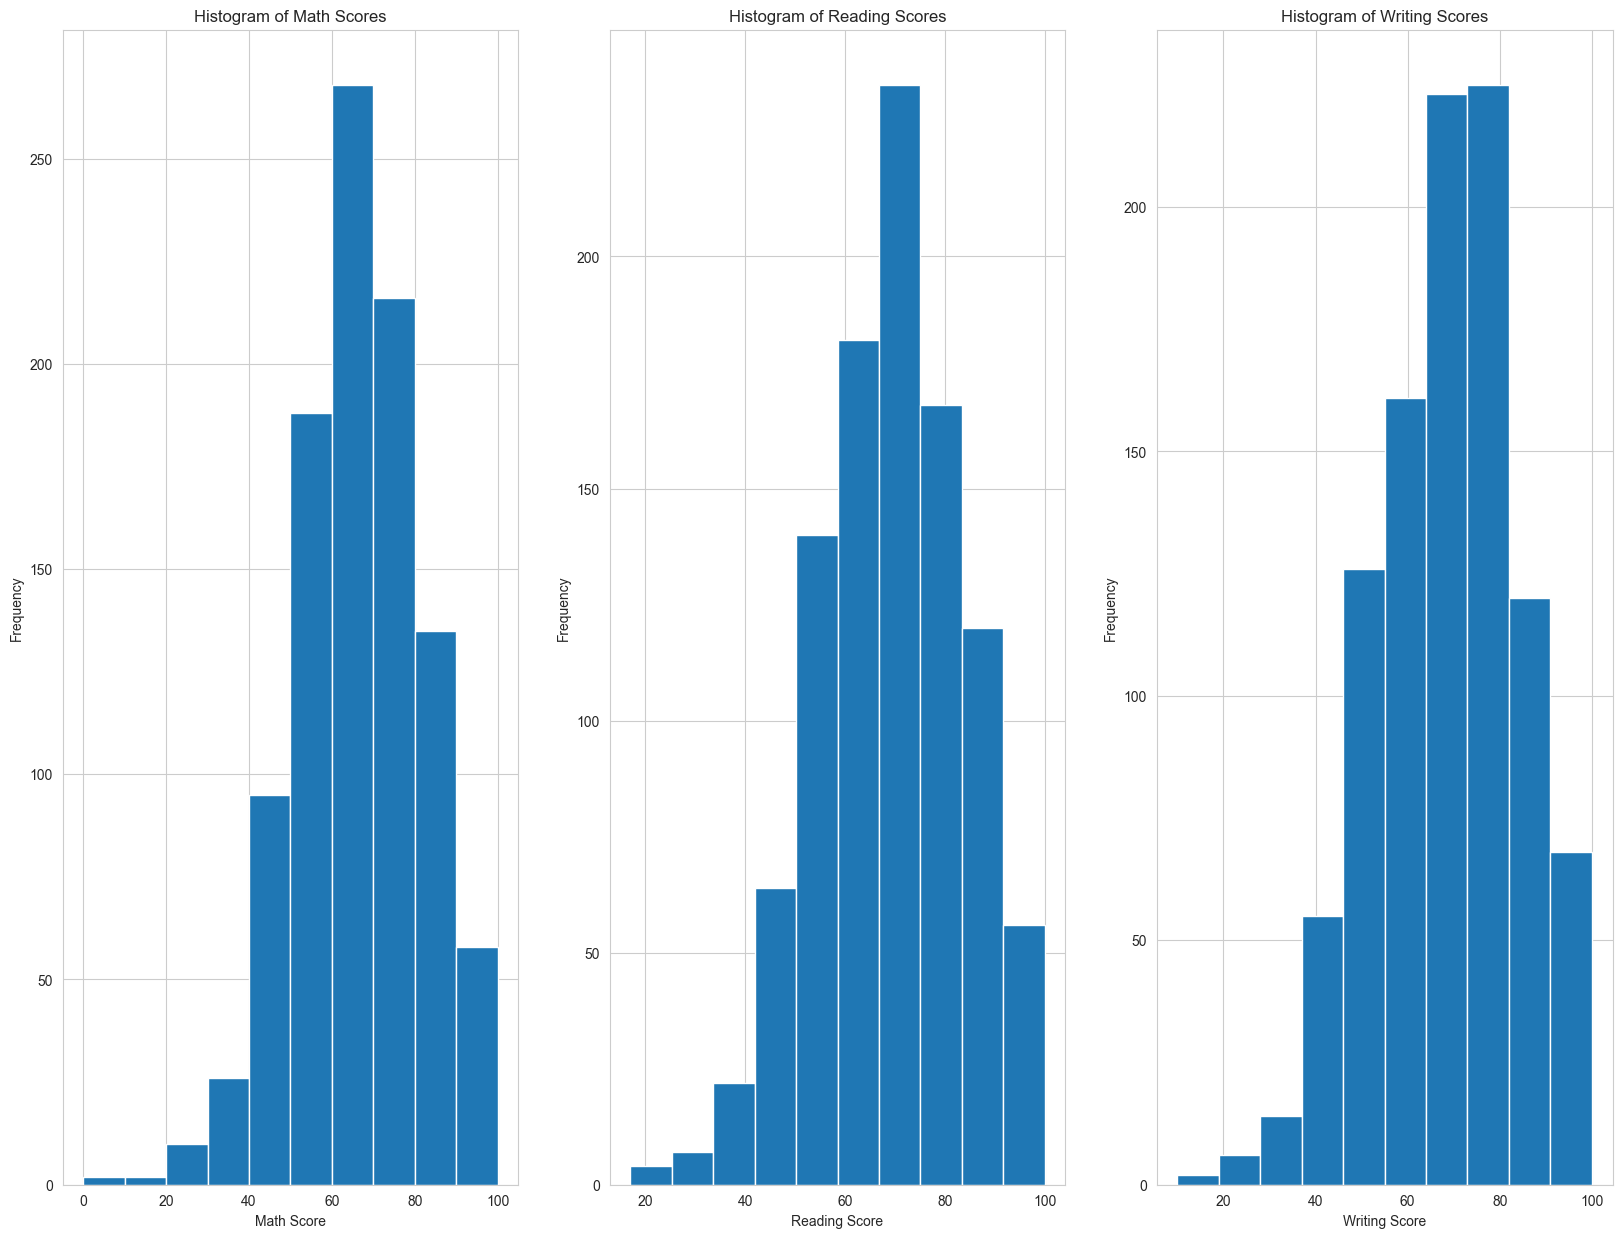

In [115]:
ex_fig = plt.figure(figsize=(20, 15))
gridsize = (1, 3)
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=1)

# Plot histograms of each feature on the subplots
df[numeric_features[0]].plot.hist(bins=10, ax=ax1)
df[numeric_features[1]].plot.hist(bins=10, ax=ax2)
df[numeric_features[2]].plot.hist(bins=10, ax=ax3)

# Add axis labels and a title to each subplot
ax1.set_xlabel('Math Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Math Scores')

ax2.set_xlabel('Reading Score')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Reading Scores')

ax3.set_xlabel('Writing Score')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram of Writing Scores')

# Display the plot
plt.show()


Les données semblent avoir une distribution normale. Il semblerait qu'il y ait un gros pic de personne qui reussisent à obtenir entre 60 et 70 pour les maths, 70 et 80 pour le reading et le writing

### Description bivariée

In [162]:
def boxplot_quali_quanti(quali, quanti, df):
    """
    plot a boxplot between categorical et numerical variable
    --------------------------------------------------------
    quali -> array of string. example ['diplome', 'sexe']
    quanti -> string. example "salaire"
    df -> DataFrame
    """
    for column in quali:
        data = pd.concat([df[quanti], df[column]], axis=1)
        f, ax = plt.subplots(figsize=(8, 6))
        # Order
        order = df.groupby(by=[column])[quanti].mean().sort_values(ascending=False).iloc[::-1].index
        # Plot
        fig = sns.boxplot(x=column, y=quanti, data=data, order=order)
        plt.xticks(size = 20)
        plt.yticks(size = 20)
        plt.xlabel(column, fontsize=20)
        plt.ylabel(quanti, fontsize=20)
        
        
def mean_quali_quanti(quali, quanti, df):
    """
    display mean of quantitative for each category of the variable qualitative
    --------------------------------------------------------------------------
    quali -> array of string. example ['diplome', 'sexe']
    quanti -> string. example "salaire"
    df -> DataFrame
    """
    for column in quali:
        print('average / standard ', column)
        print(df.groupby([column])[quanti].agg(['mean', 'std']).sort_values(by='mean', ascending=False))
        print('')

In [163]:
# Plotting Categorical Features
def plotting_categorical(nominal_features,  target_name, data, order=None):
    """
    plot a countplot between two categorical variables
    --------------------------------------------------------------------------
    nominal_features -> array of string. example ['sexe', 'diplome']
    target_name -> string. example "embauche"
    data -> DataFrame
    """
    for column in nominal_features:
        # Figure initiation
        fig = plt.figure(figsize=(18,8))

        # Number of occurrences per categoty - target pair
        ax = sns.countplot(x=column, hue=target_name, order=order, data=data, ax = plt.subplot(211));
        
        # X-axis Label
        plt.xlabel(column, fontsize=12);
        plt.xticks(size=20)
        plt.yticks(size=20)

        # Y-axis Label
        plt.ylabel('Nombre d occurence', fontsize=12);
        # Adding Super Title (One for a whole figure)
        plt.suptitle('Graphique '+column + '/'+ target_name, fontsize=18);
        # Setting Legend location 
        plt.legend(loc=1, prop={'size': 14} );

In [164]:
df.head(3)

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93


#### Score X Gender

Let's see the sex distribution in our data

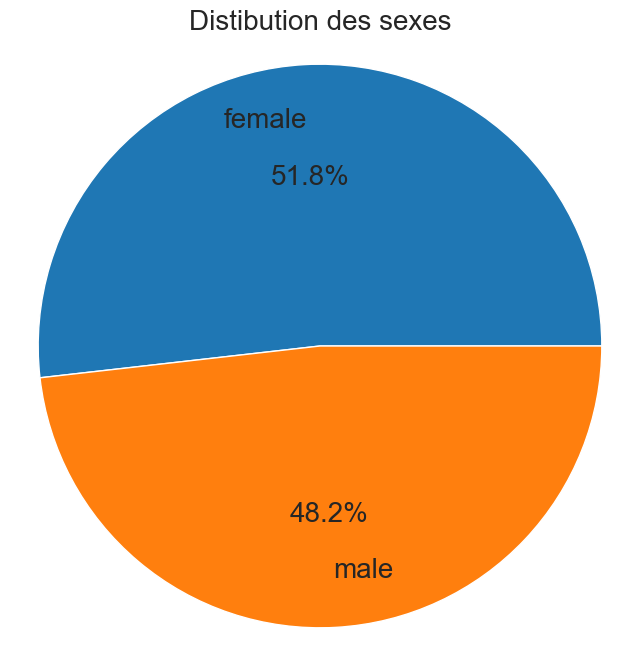

In [165]:
count_gender = df.groupby('gender')['id'].nunique()
fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.pie(count_gender,  labels=count_gender.index,  autopct='%1.1f%%', startangle=0, textprops={'fontsize': 20}, labeldistance=0.8)
plt.axis('equal')
plt.title('Distibution des sexes', size=20)
plt.show()

##### Maths score X Gender

average and standard deviation for gender
             mean        std
gender                      
male    68.728216  14.356277
female  63.633205  15.491453



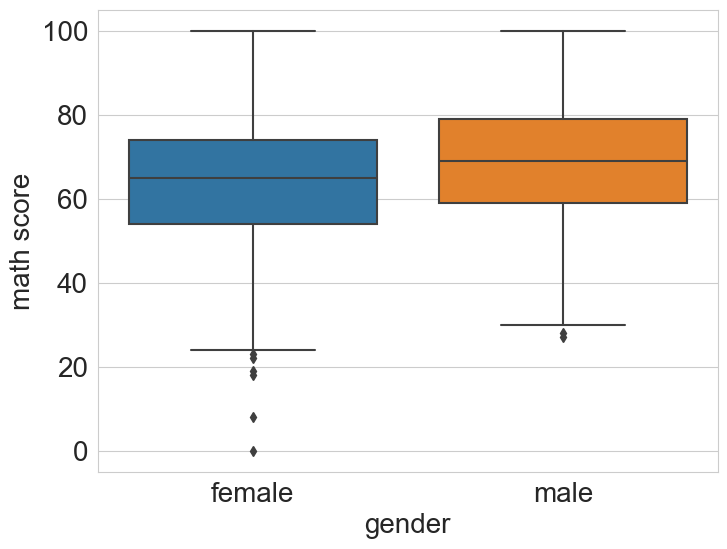

In [149]:
# Répartition des scores de maths par rapport au sexe 
boxplot_quali_quanti(["gender"], "math score", df)
mean_quali_quanti(["gender"], "math score", df)

Il semblerait que les hommes ont des meilleurs scores en maths que les femmes.

#### Reading score X Gender

average and standard deviation for gender
             mean        std
gender                      
female  72.608108  14.378245
male    65.473029  13.931832



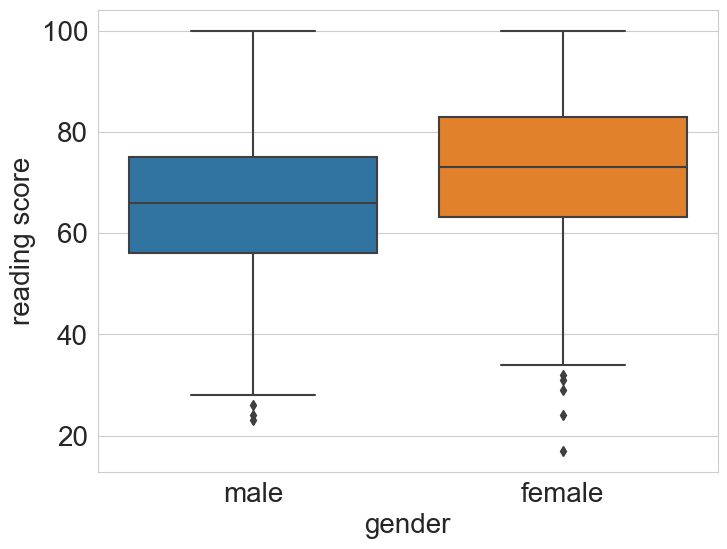

In [150]:
# Répartition des scores de lecture par rapport au sexe 
boxplot_quali_quanti(["gender"], "reading score", df)
mean_quali_quanti(["gender"], "reading score", df)

Il semblerait que les femmes ont des meilleurs scores en lecture que les hommes.

#### Writing score X Gender

average and standard deviation for gender
             mean        std
gender                      
female  72.467181  14.844842
male    63.311203  14.113832



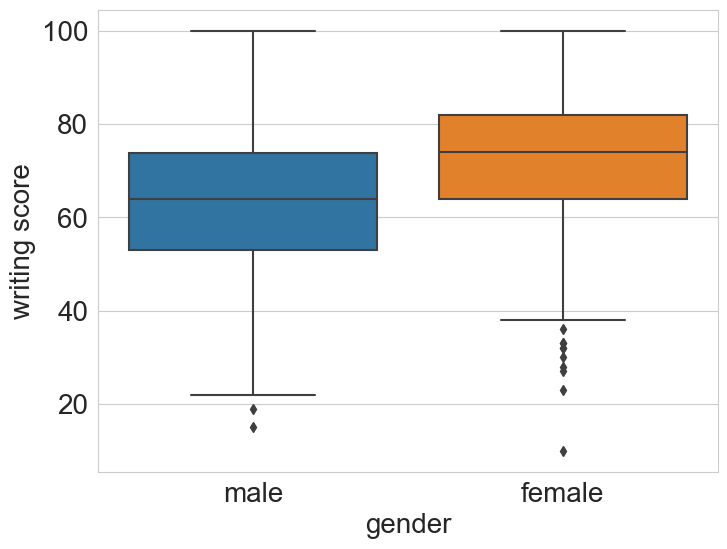

In [151]:
# Répartition des scores de écriture par rapport au sexe 
boxplot_quali_quanti(["gender"], "writing score", df)
mean_quali_quanti(["gender"], "writing score", df)

Il semblerait que les femmes ont des meilleurs scores en écriture que les hommes.

**Conclusion**:

Si on est une femme, on a plus de chance de réussir aux examens de littérature

Si on est un homme, on a plus de chance de réussir aux examens de mathématiques

In [152]:
df.head(3)

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93


#### Score X Race/Ethnicity 

Let's see the race/ethnicity distribution in our data

In [175]:
import pandas as pd
import numpy as np
import panel as pn
from bokeh.plotting import figure
from bokeh.models import NumeralTickFormatter
import holoviews as hv

# load the Bokeh library for use with Panel in the notebook environment
pn.extension('bokeh')


# group the data by race/ethnicity and count the number of unique ids
count_race = df.groupby('race/ethnicity')['id'].nunique()

# create a histogram with the counts of unique ids for each race/ethnicity using Bokeh
hist, edges = np.histogram(count_race, bins=range(1, max(count_race)+2))
p = figure(title='Distribution of Ethnicities', x_axis_label='Number of unique IDs',
           y_axis_label='Count', width=800, height=500)
p.vbar(x=edges[:-1], top=hist, width=0.9*(edges[1]-edges[0]), 
       fill_color='navy', line_color='white')

# format the y-axis ticks as integers
p.yaxis.formatter = NumeralTickFormatter(format='0')

# create a Panel object from the Bokeh plot
bokeh_pane = pn.pane.Bokeh(p)

# show the plot
bokeh_pane.show()


Launching server at http://localhost:49461


In [185]:
??px.histogram

Signature:
px.histogram(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    pattern_shape_sequence=None,
    pattern_shape_map=None,
    marginal=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    barnorm=None,
    histnorm=None,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    histfunc=None,
    cumulative=None,
    nbins=None,
    text_auto=False,
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a histogram, rows of `data_frame` are grouped together into a
    rectangular mark to visualize the 1D distribution of a

In [190]:
import plotly.express as px

count_race = df.groupby('race/ethnicity')['id'].nunique()

# create the histogram using Plotly
fig = px.density_contour(df, 
                   x='race/ethnicity',
                   
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# show the histogram
fig.show()


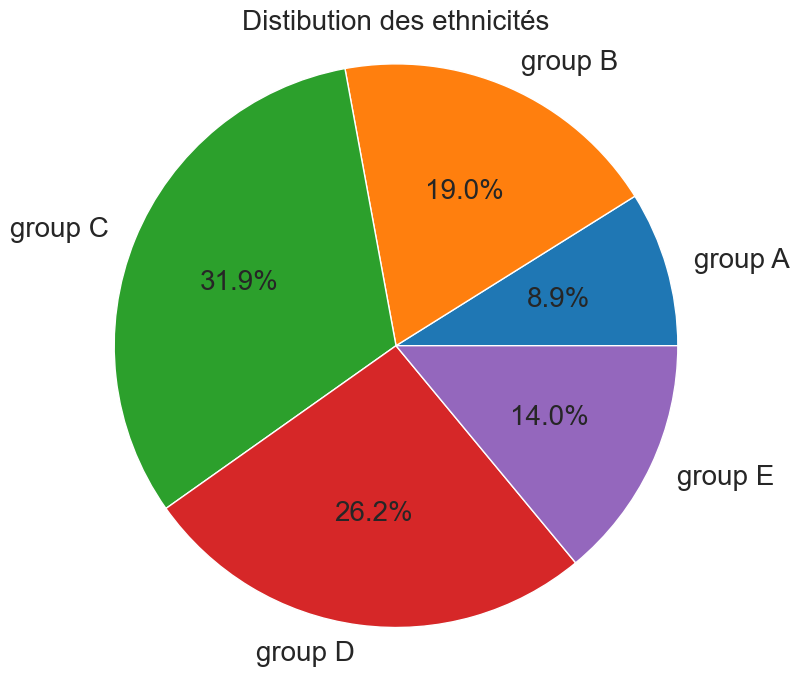

In [153]:
count_race = df.groupby('race/ethnicity')['id'].nunique()
fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.pie(count_race,  labels=count_race.index,  autopct='%1.1f%%', startangle=0, textprops={'fontsize': 20})
plt.axis('equal')
plt.title('Distibution des ethnicités', size=20)
plt.show()

La répartition des ethnicités est inégale, on retrouve plus de personnes du Groupe C ou D que les autres tranches d'éthnicités

##### Maths score X Race/Ethnicity 

average and standard deviation for race/ethnicity
                     mean        std
race/ethnicity                      
group E         73.821429  15.534259
group D         67.362595  13.769386
group C         64.463950  14.852666
group B         63.452632  15.468191
group A         61.629213  14.523008



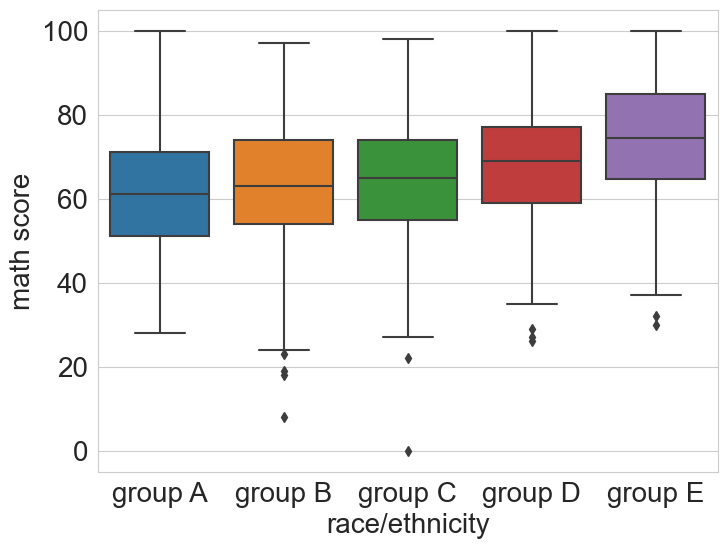

In [154]:
# Répartition des scores de maths par rapport au groupe ethnique 
boxplot_quali_quanti(["race/ethnicity"], "math score", df)
mean_quali_quanti(["race/ethnicity"], "math score", df)

Il semblerait que les personnes du groupe E se démarquent des autres groupes ethniques en mathématiques.

**Group E:** Mixed - White & Black Caribbean. E. Mixed - White & Black African. F. Mixed - White & Asian

#### Reading score X Race/Ethnicity 

average and standard deviation for race/ethnicity
                     mean        std
race/ethnicity                      
group E         73.028571  14.874024
group D         70.030534  13.895306
group C         69.103448  13.997033
group B         67.352632  15.177499
group A         64.674157  15.543762



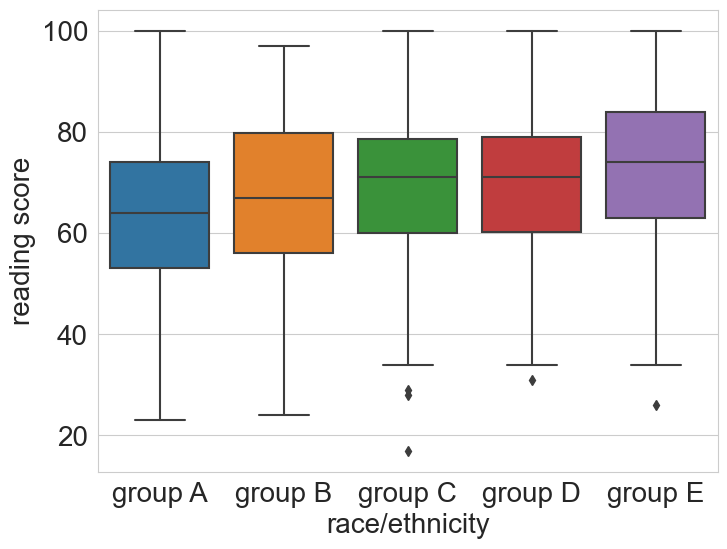

In [155]:
# Répartition des scores de lecture par rapport au groupe ethnique  
boxplot_quali_quanti(["race/ethnicity"], "reading score", df)
mean_quali_quanti(["race/ethnicity"], "reading score", df)

Il semblerait encore une fois que les persone du Groupe E se démarquent du reste. On remarque également que les personnes du groupe A ont des notes plus basses dans les examens de lecture. 

#### Writing score X Race/Ethnicity 

average and standard deviation for race/ethnicity
                     mean        std
race/ethnicity                      
group E         71.407143  15.113906
group D         70.145038  14.367707
group C         67.827586  14.983378
group B         65.600000  15.625173
group A         62.674157  15.468278



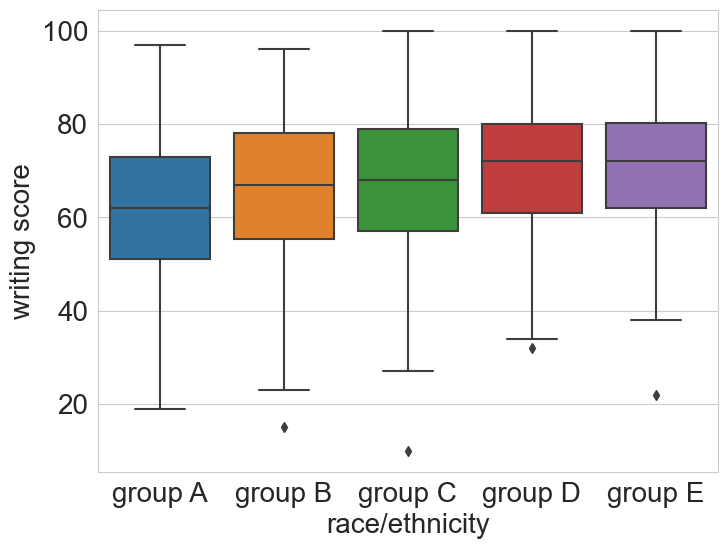

In [156]:
# Répartition des scores de lecture par rapport au groupe ethnique  
boxplot_quali_quanti(["race/ethnicity"], "writing score", df)
mean_quali_quanti(["race/ethnicity"], "writing score", df)

On remarque que les scores lors des examens d'écritures sont équivalents en fonction des groupes ethniques. Toutefois, les personnes du groupe A présentent des scores relativement bas par rapport au reste des groupes.

**Conclusion**:

Le groupe ethnique d'une personne peut refléter la note d'une personne en moyenne dans les 3 matières; les personnes du gorupe E ont tendance à avoir les meilleurs notes tandis que les personnes du groupe A ont tendance à avoir les moins bonnes notes

In [157]:
df.head(3)

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93


#### Score X Parental Education

Let's see the race/ethnicity distribution in our data

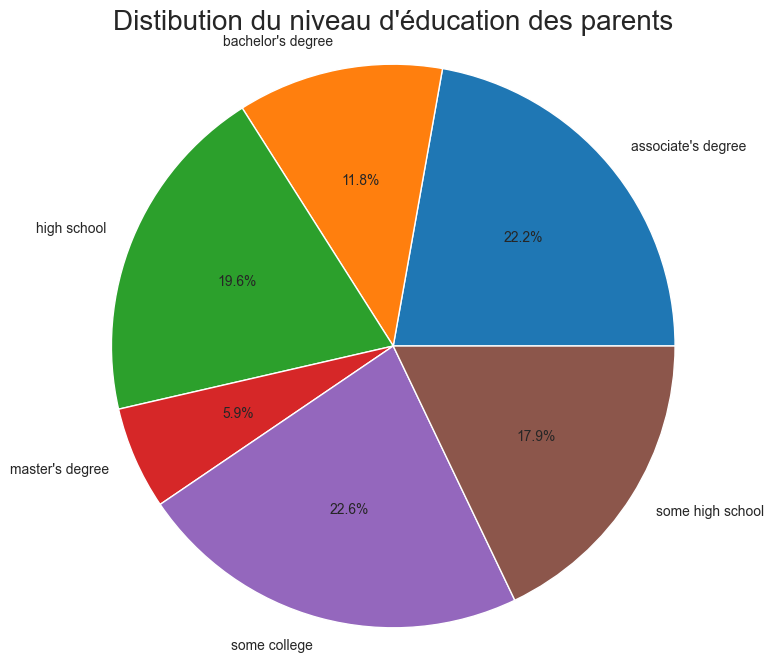

In [158]:
count_race = df.groupby('parental level of education')['id'].nunique()
fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.pie(count_race,  labels=count_race.index,  autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title("Distibution du niveau d'éducation des parents", size=20)
plt.show()

La répartition du niveau d'éducation des parents semble être égale quelque soit le diplôme. On remarque toutefois que peu de parents ont un/des Masters

##### Maths score X Parental Education

average and standard deviation for parental level of education
                                  mean        std
parental level of education                      
master's degree              69.745763  15.153915
bachelor's degree            69.389831  14.943789
associate's degree           67.882883  15.112093
some college                 67.128319  14.312897
some high school             63.497207  15.927989
high school                  62.137755  14.539651



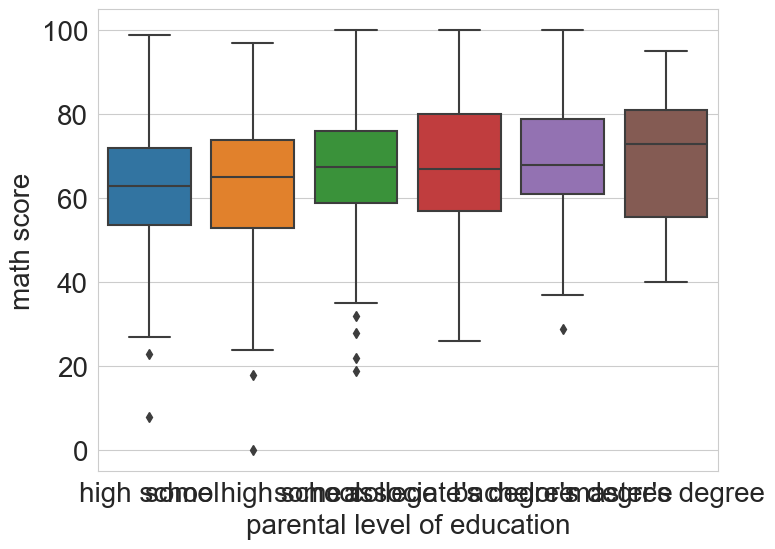

In [159]:
# Répartition des scores de maths par rapport au groupe ethnique 
boxplot_quali_quanti(["parental level of education"], "math score", df)
mean_quali_quanti(["parental level of education"], "math score", df)

Les données tendent à nous montrer que plus nos parents sont qualifiés, plus a nos de chance d'avoir une bonne note en maths.

#### Reading score X Parental Education

average and standard deviation for parental level of education
                                  mean        std
parental level of education                      
master's degree              75.372881  13.775163
bachelor's degree            73.000000  14.285250
associate's degree           70.927928  13.868948
some college                 69.460177  14.057049
some high school             66.938547  15.479295
high school                  64.704082  14.132130



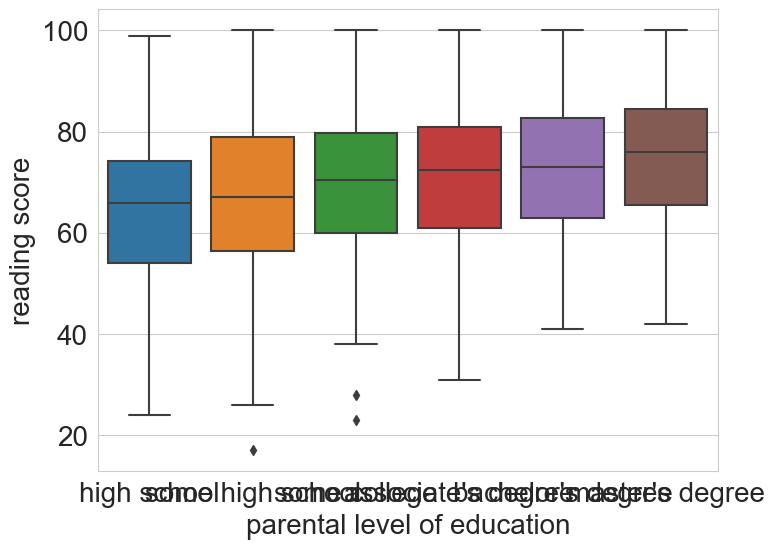

In [160]:
# Répartition des scores de lecture par rapport au groupe ethnique  
boxplot_quali_quanti(["parental level of education"], "reading score", df)
mean_quali_quanti(["parental level of education"], "reading score", df)

Nous pouvons faire le même raisonnement pour les notes en lecture. On constate que l'écart est encore plus flagrant.

#### Writing score X Race/Ethnicity 

average and standard deviation for parental level of education
                                  mean        std
parental level of education                      
master's degree              75.677966  13.730711
bachelor's degree            73.381356  14.728262
associate's degree           69.896396  14.311122
some college                 68.840708  15.012331
some high school             64.888268  15.736197
high school                  62.448980  14.085907



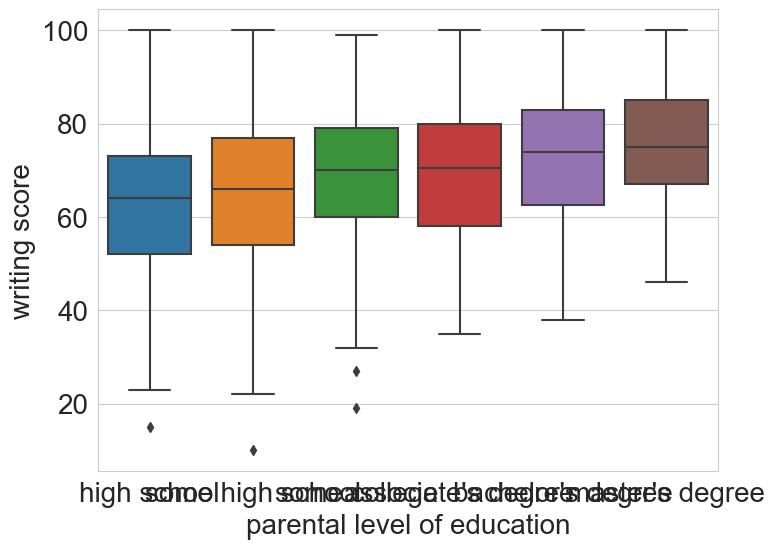

In [161]:
# Répartition des scores de lecture par rapport au groupe ethnique  
boxplot_quali_quanti(["parental level of education"], "writing score", df)
mean_quali_quanti(["parental level of education"], "writing score", df)

On remarque que les scores lors des examens d'écritures sont équivalents en fonction des groupes ethniques. Toutefois, les personnes du groupe A présentent des scores relativement bas par rapport au reste des groupes.

**Conclusion**:

Le groupe ethnique d'une personne peut refléter la note d'une personne en moyenne dans les 3 matières; les personnes du gorupe E ont tendance à avoir les meilleurs notes tandis que les personnes du groupe A ont tendance à avoir les moins bonnes notes